In [140]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# Load the data
data = pd.read_csv("Book2.csv")

In [141]:
import pandas as pd
# converting the XLSX file to csv 
df = pd.read_excel('Book2.xlsx')
df.to_csv('Book2.csv', index=False)

In [142]:
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [143]:
data1=data.rename(columns={"ID#":"ID","Award?":"Award"})
data1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [144]:
data11=data1.drop(["ID", "Award"], axis=1)

In [145]:
data11

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


# Exploratory Data Analysis

In [146]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [147]:
data11.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [148]:
data11.shape

(3999, 10)

# Missing values

In [7]:
#checking missing values
data11.isna().value_counts()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll
False    False       False      False      False      False        False        False              False            False                3999
dtype: int64

In [149]:
data11.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

# Visualizing the data

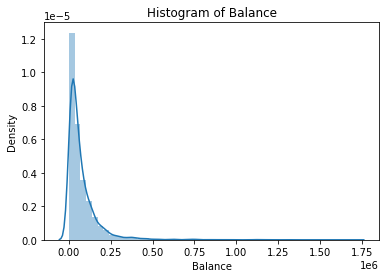

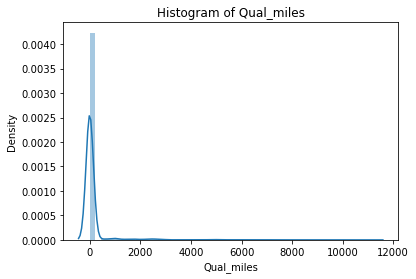

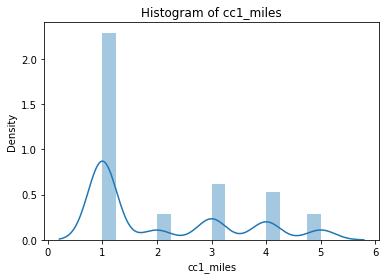

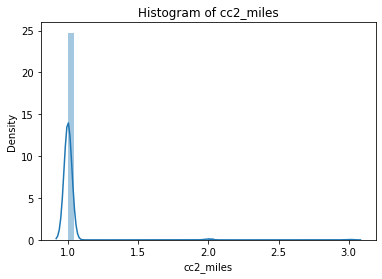

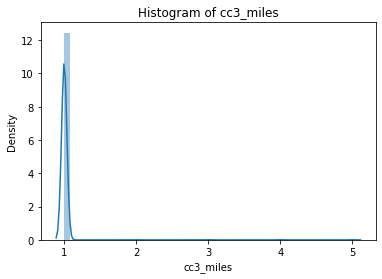

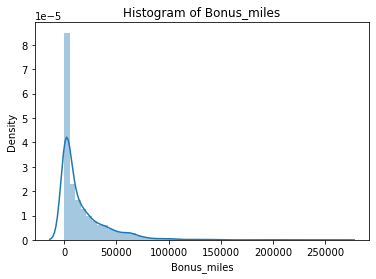

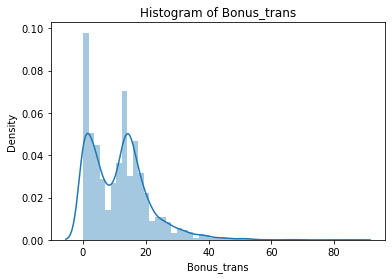

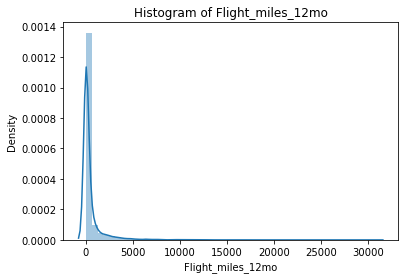

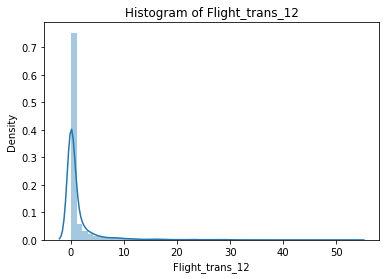

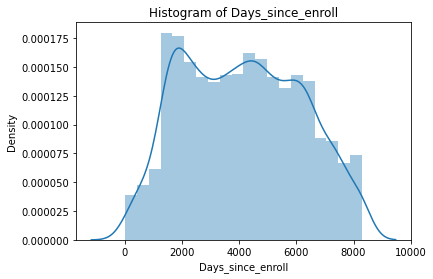

In [153]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
# Loop through each column in the DataFrame
for column in data11.columns:
    if data11[column].dtype == 'int64' or data11[column].dtype == 'float64':
        # Plot the bar plot
        sns.distplot(data11[column])
        # Add labels and a title to the plot
        plt.xlabel(column)
        plt.title('Histogram of ' + column)
        
        # Show the plot
        plt.show()


<AxesSubplot:>

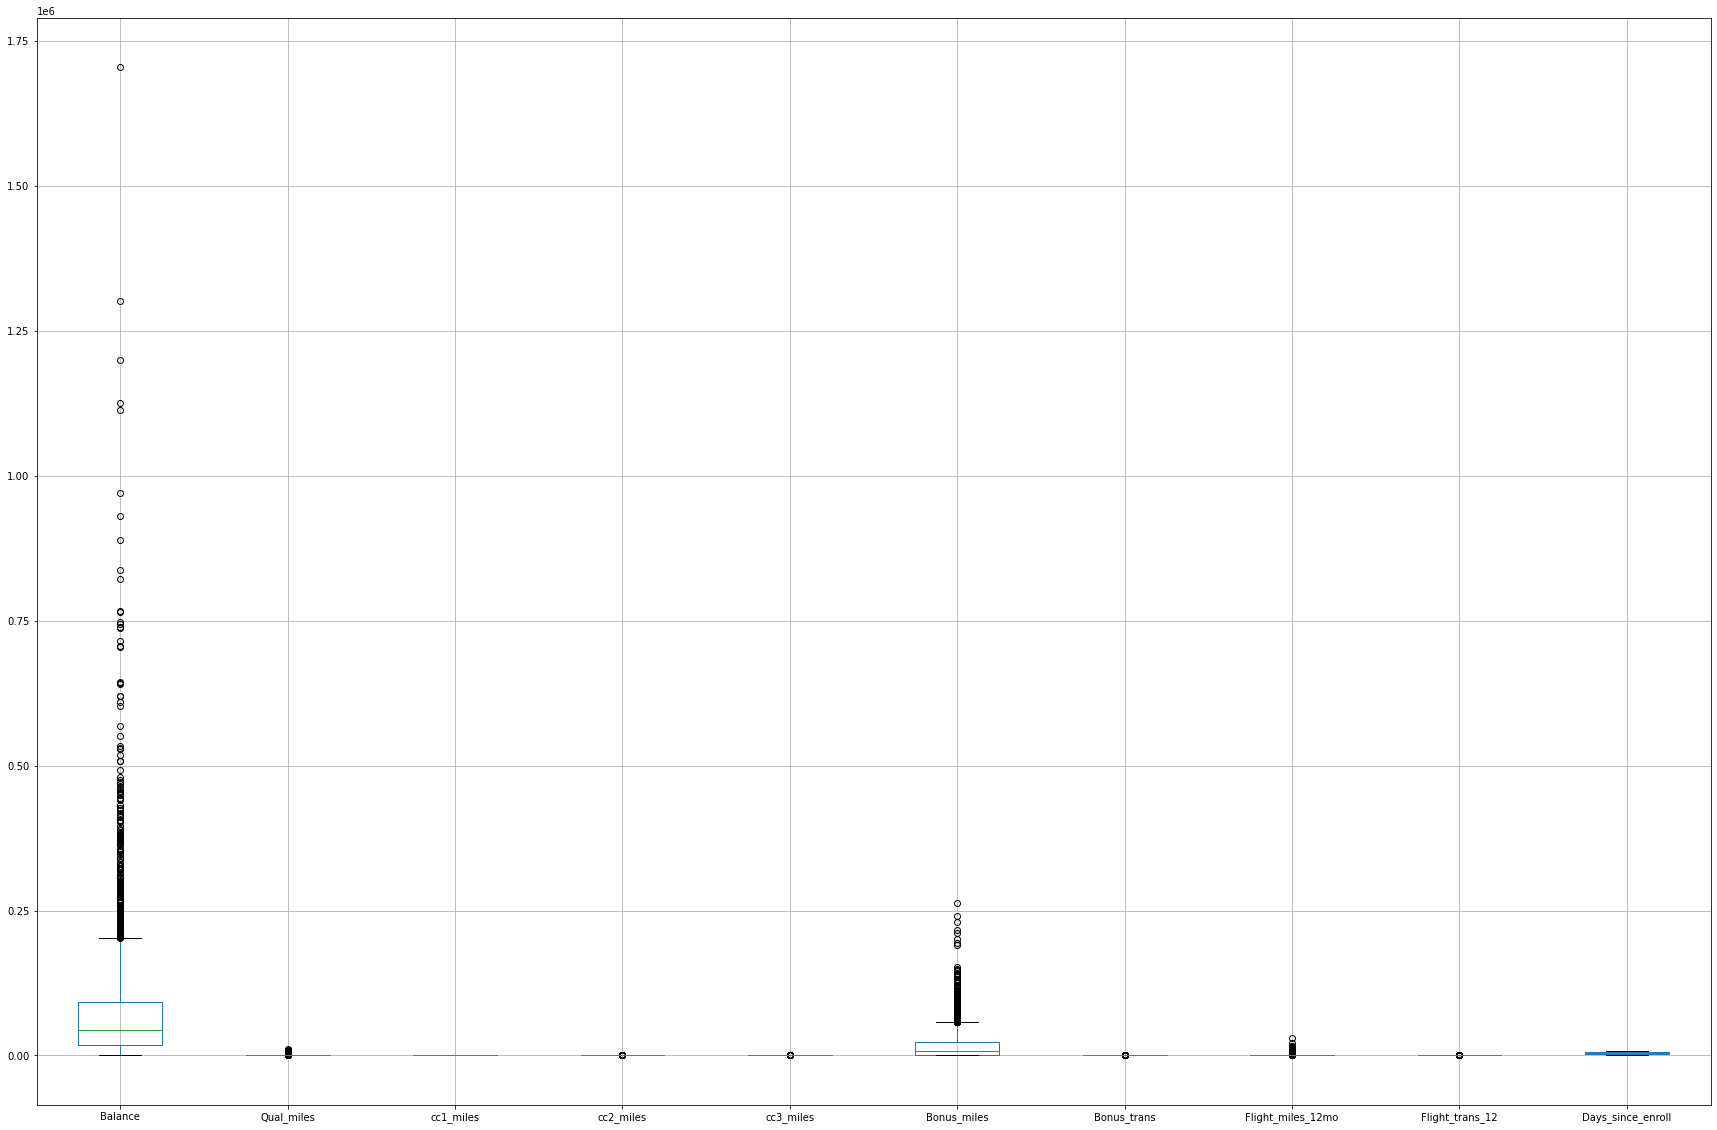

In [154]:
fig = plt.figure(figsize=(30,20))
data11.boxplot()

<Figure size 2160x1440 with 0 Axes>

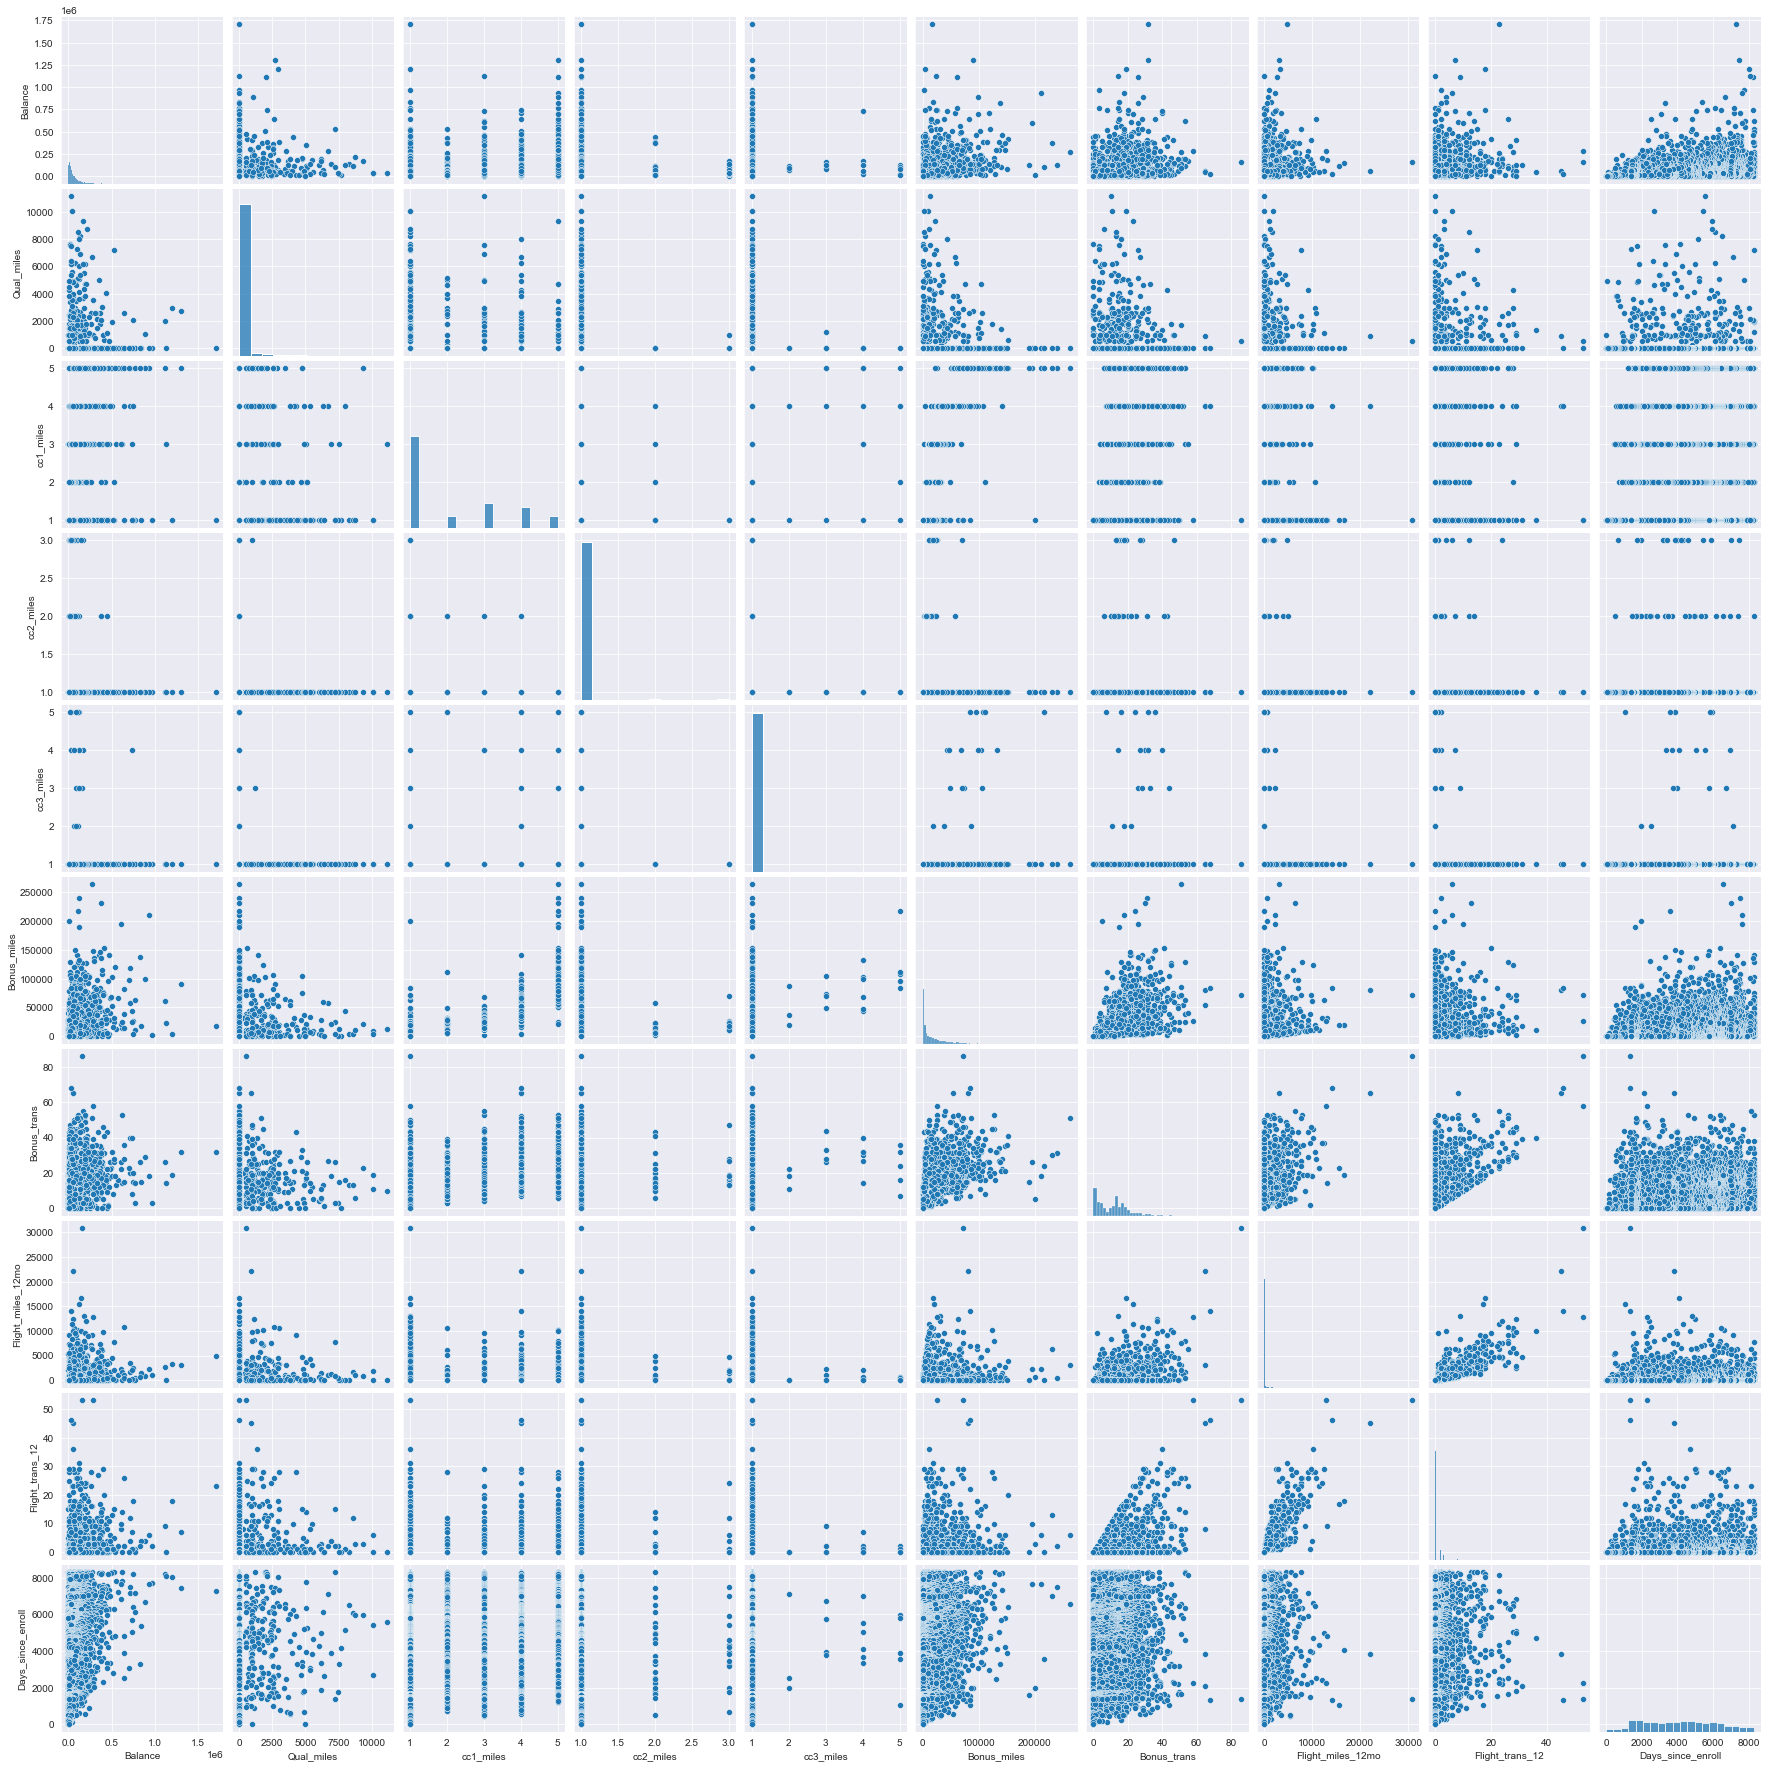

In [157]:
#Format the plot background and scatter plots for all the variables
fig=plt.figure(figsize=(30,20))
sns.set_style(style='darkgrid')
import seaborn as sns
sns.pairplot(data11)

In [158]:
data11.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


<AxesSubplot:>

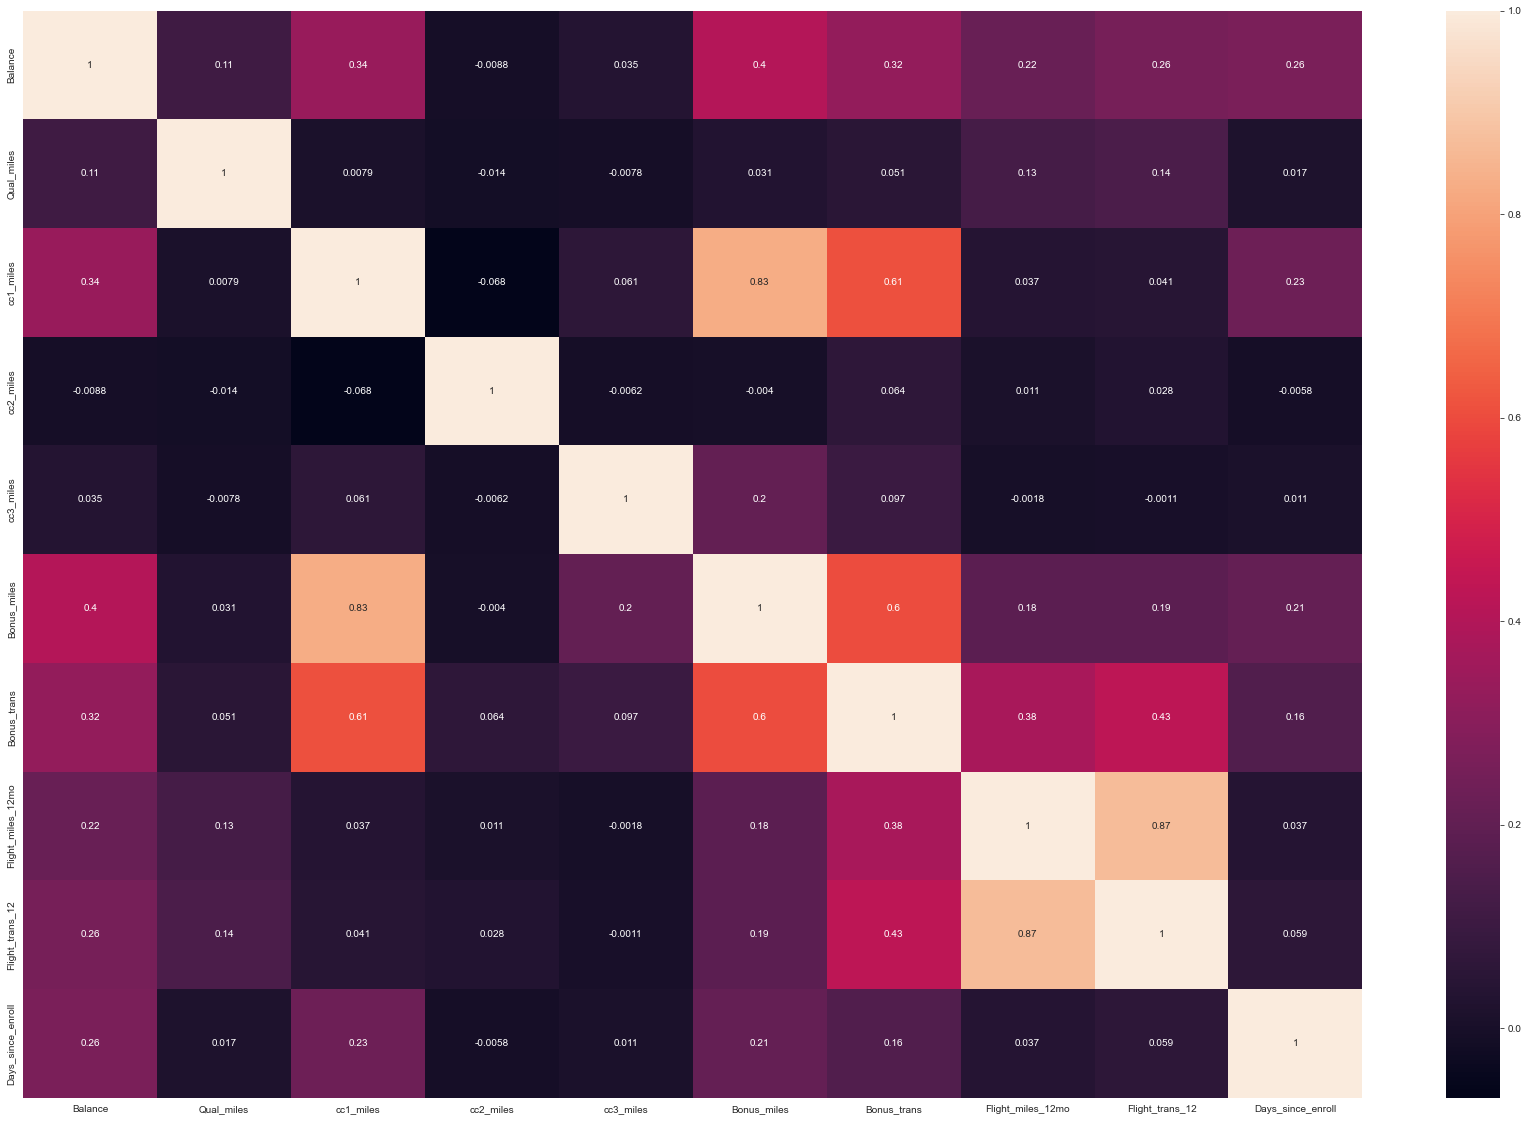

In [159]:
fig=plt.figure(figsize=(30,20))
sns.heatmap(data11.corr(),annot=True)

In [9]:
#normailising the data
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [10]:
df_data1=norm_func(data11.iloc[:,:])
df_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


# Hierarchical Clustering



In [11]:
# Define the number of clusters
n_clusters = range(2, 11)


In [12]:

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import numpy as np
#df = pd.read_csv('your_file.csv')

X = df_data1[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']].values
Z = linkage(X, method='complete')


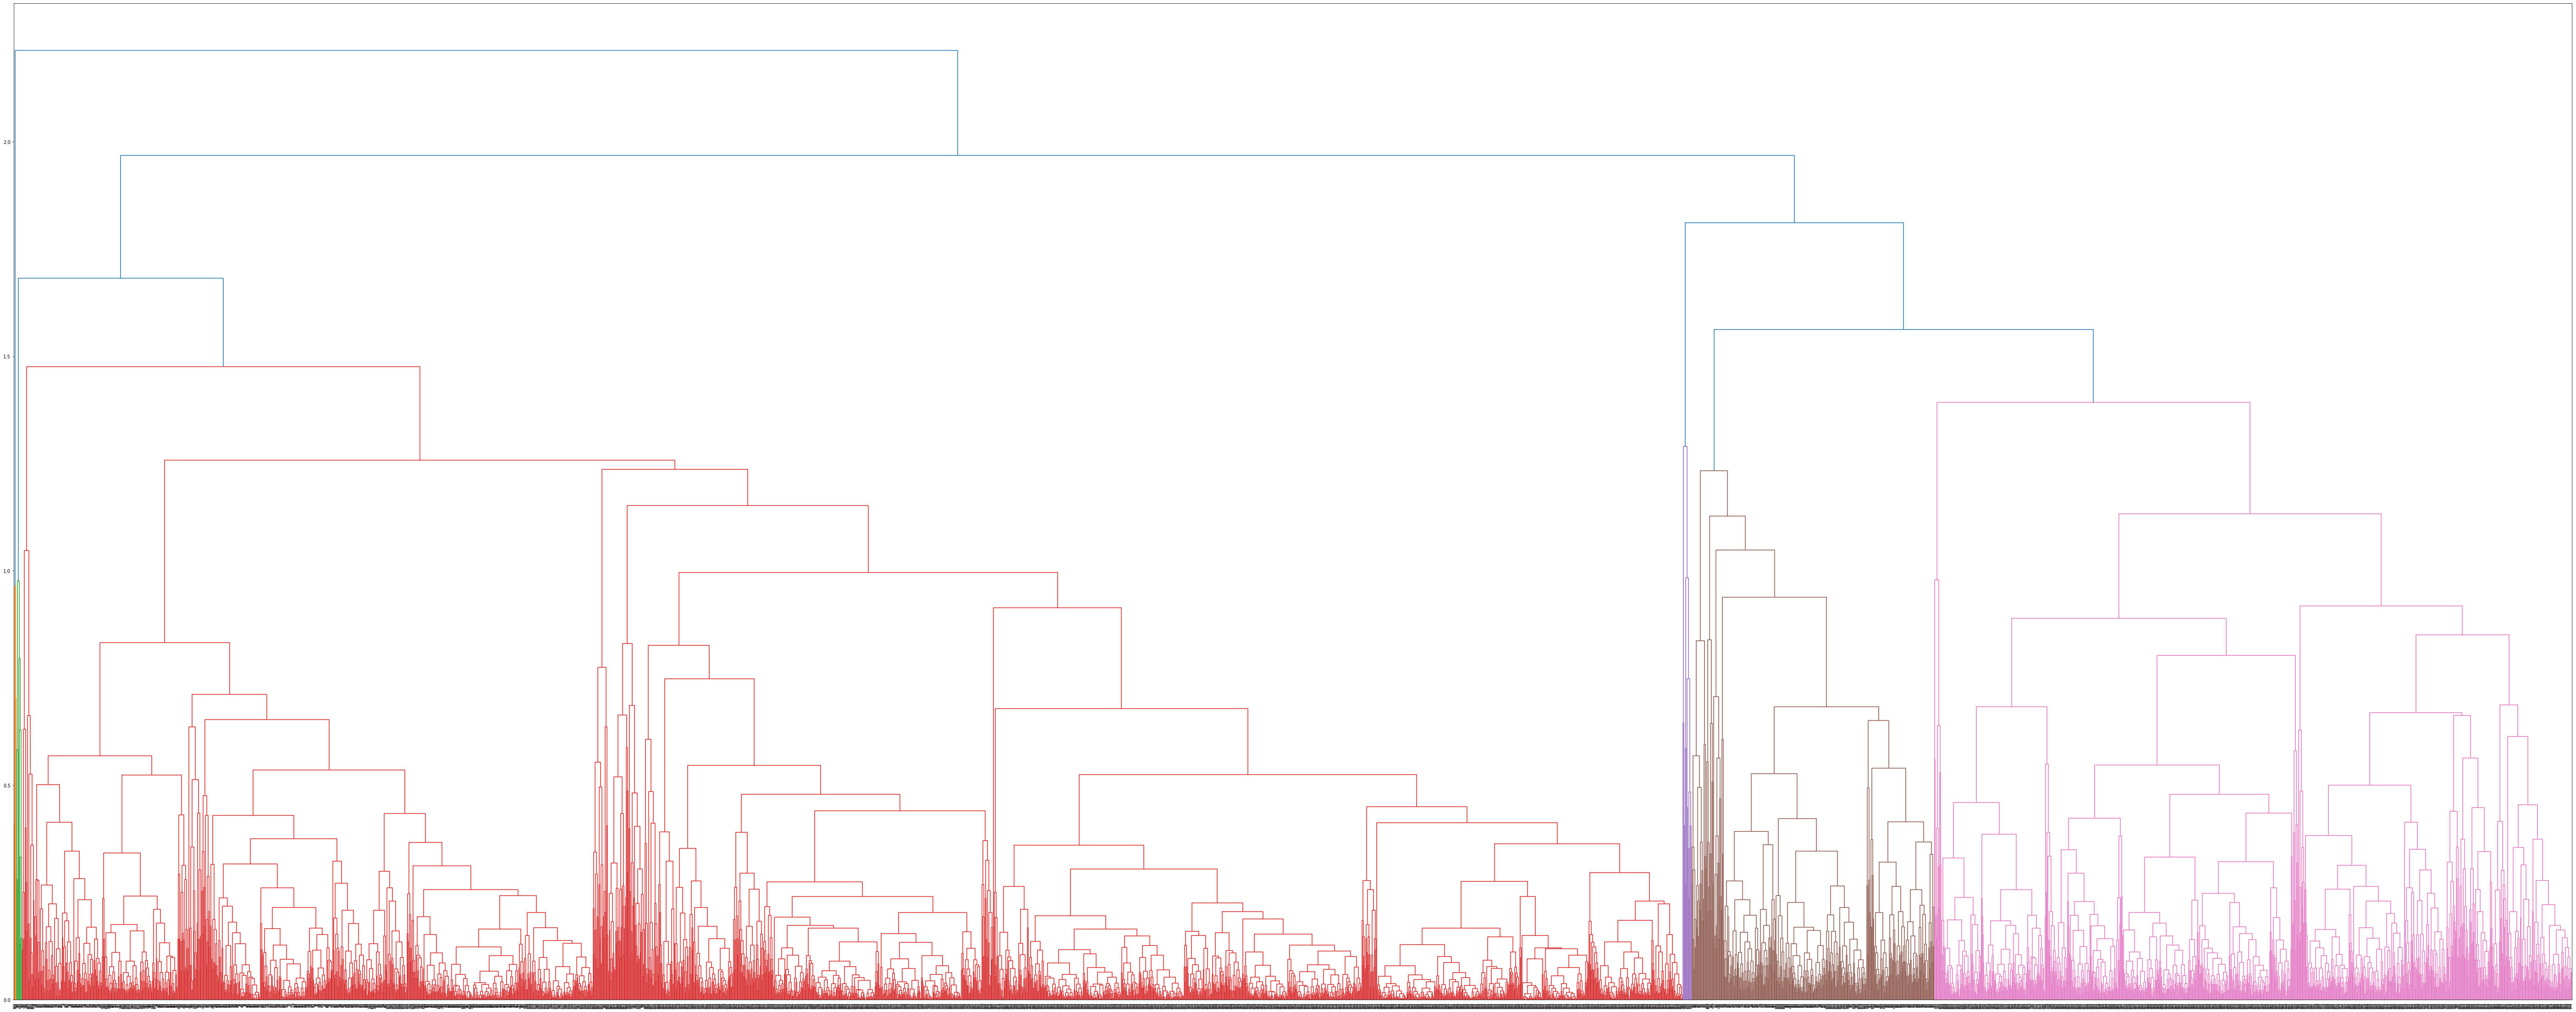

In [13]:
plt.figure(figsize=(100,40))
dendrogram(Z)
plt.show()

In [94]:
# Perform hierarchical clustering
for n in n_clusters:
        model = AgglomerativeClustering(n_clusters=n)
        model.fit(scaled_data)
        print("Number of clusters:", n, "Silhouette Score:", silhouette_score(scaled_data, model.labels_))


Number of clusters: 2 Silhouette Score: 0.32507831694250006
Number of clusters: 3 Silhouette Score: 0.31619409882758315
Number of clusters: 4 Silhouette Score: 0.3350233247024554
Number of clusters: 5 Silhouette Score: 0.32701816589484084
Number of clusters: 6 Silhouette Score: 0.34713268531540054
Number of clusters: 7 Silhouette Score: 0.24349268923793294
Number of clusters: 8 Silhouette Score: 0.2064418844275397
Number of clusters: 9 Silhouette Score: 0.22070325657753015
Number of clusters: 10 Silhouette Score: 0.2255303798353131


In [14]:
hc=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')

In [15]:
hc.fit(df_data1)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=6)

In [16]:
y_hc=hc.fit_predict(df_data1)
y_hc


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [17]:
data11['hierarchy_cluster']=y_hc
data11

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchy_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,5
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
data11["hierarchy_cluster"].unique()

array([0, 5, 4, 2, 1, 3], dtype=int64)

In [25]:
data11["hierarchy_cluster"].value_counts()

0    2596
2     997
5     379
1      14
4       9
3       4
Name: hierarchy_cluster, dtype: int64

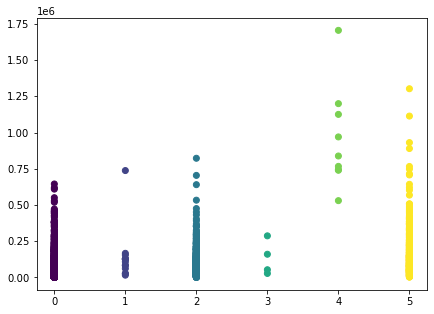

In [43]:
# Plot Clusters
plt.figure(figsize=(7, 5))  #Flight_miles_12mo#Balance
plt.scatter(data11['hierarchy_cluster'],data11["Balance"], c=data11["hierarchy_cluster"]) 

# K-means

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [46]:
df_data1.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [48]:
nc=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
    kmeans.fit(df_data1)
    nc.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'Elbow graph')

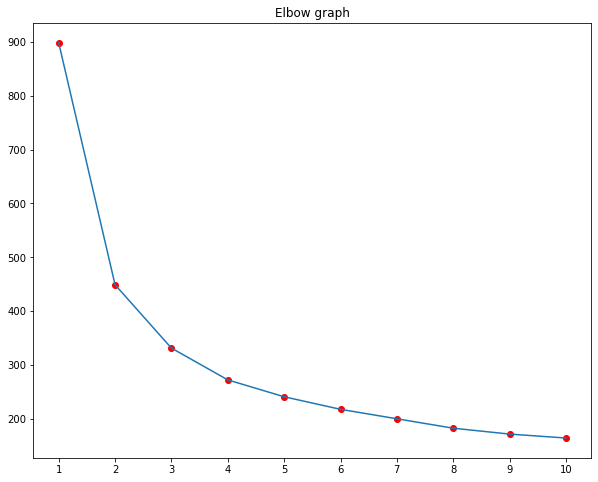

In [49]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),nc)
plt.scatter(range(1,11),nc,color='red')
plt.xticks(range(1,11))
plt.title('Elbow graph')

In [112]:
clustered=KMeans(n_clusters=4,init='k-means++',random_state=10) #7
clustered.fit(df_data1)

KMeans(n_clusters=4, random_state=10)

In [113]:
clustered.labels_

array([0, 0, 0, ..., 2, 1, 1])

In [114]:
data11['Kmeans_cluster']=clustered.labels_

In [115]:
data11

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchy_cluster,Kmeans_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,2,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [116]:
data11.Kmeans_cluster.unique()

array([0, 2, 3, 1])

In [117]:
data11.groupby(['Kmeans_cluster']).agg(['mean']).reset_index()

,Kmeans_cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,hierarchy_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,65904.824805,173.610581,1.129228,1.000000,1.006071,5011.595837,7.856028,489.399827,1.495230,5749.581960,0.087598
1,1,40110.154676,123.774820,1.112230,1.000000,1.005036,4473.905755,7.059712,390.650360,1.133094,2177.220144,0.212950
2,2,112933.763791,143.630835,3.778642,1.000707,1.024752,39597.512023,18.942716,500.302687,1.484441,4700.347242,2.509901
3,3,69094.976190,23.809524,1.071429,2.357143,1.000000,13672.833333,17.619048,596.500000,2.261905,4005.333333,0.119048


In [118]:
for i in np.array([0,1,2,3,4,5,6]):
    print('States that belong to cluster index',i)
    print(data11[data11['Kmeans_cluster']==i])
    print('\n')

States that belong to cluster index 0
      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
2184   109268           0          2          1          1         7401   
2190    61617           0          2          1          1        23495   
2200    12271         500          2          1          1         7684   
2202    35445           0          1          1          1         3379   
2208    65519           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_s

In [119]:
data12=data11.sort_values('Kmeans_cluster')
data12.iloc[:,[-1]]

,Kmeans_cluster
0,0
1045,0
1044,0
1859,0
1041,0
...,...
3367,3
3191,3
1527,3
794,3


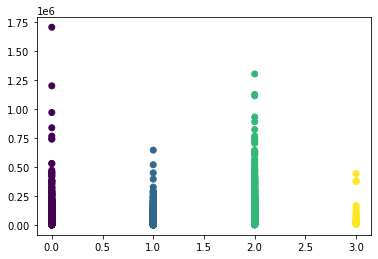

In [120]:
plt.scatter(data11.iloc[:,-1],data11.iloc[:,0],c=data11['Kmeans_cluster'])

# DB Scan


In [85]:
from sklearn.cluster import DBSCAN 

In [86]:
df_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [129]:
dbs=DBSCAN(min_samples=2,eps=0.5)
class_pre=dbs.fit_predict(df_data1.iloc[:,:])

In [130]:
??DBSCAN

In [131]:
class_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [132]:
df_data1["DBscan_cluster"]=class_pre

In [133]:
df_data1["DBscan_cluster"].unique()

array([ 0,  1,  2, -1,  3,  4], dtype=int64)

In [134]:
df_data1["DBscan_cluster"].value_counts()

 0    3948
 1      27
 2      15
-1       5
 3       2
 4       2
Name: DBscan_cluster, dtype: int64

In [135]:
df_data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,DBscan_cluster
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0


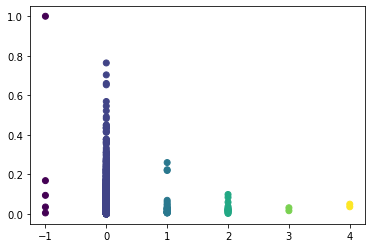

In [139]:
plt.scatter(df_data1['DBscan_cluster'],df_data1['Balance'],c=df_data1["DBscan_cluster"])
